In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd

import statistics


### Simulation draft: 1 dimention

### Simulation draft 2: 2 dimentions

In [3]:

def z_combined(z1,z2, env_opt):
    x0,y0 = env_opt
    return ((np.sqrt((x0 - z1)**2 + (y0 - z2)**2)))


def w(z_combined):
    return (np.exp(-z_combined**2 /(2))) 

In [4]:
# Simulation parameters
generations = 3000

r = 5 # Switch environment every r generations

# Define environment optima (only 1D now)
Env = np.array([
    [0.9, -0.3],  # From Dry
    [0.2, 0.5],  # From Normal
 ])

# Epigenetic weight and constant (off)
k = 0
E = 7


In [11]:
population_size = 1000

### Create empty lists ####
mean_fitness_over_time = []
mean_A_over_time = []
mean_B_over_time = []
optimum_A_over_time = []
optimum_B_over_time = []
mean_com_pheno_over_time = []
var_com_pheno_over_time= []
optimum_com_pheno_over_time = []
var_fitness_over_time= []

z1_vals = np.linspace(-1, 1, 100)
z2_vals = np.linspace(-1, 1, 100)

Ag = np.random.choice(z1_vals, size=population_size)
Bg = np.random.choice(z2_vals, size=population_size)

A = (1 - k) * Ag + k * E
B = (1 - k) * Bg + k * E


# Define states
states = ["Dry", "Wet"]
n_states = len(states)

# Transition probability matrix
P = np.array([
    [0.6, 0.4],  # From Dry
    [0.4, 0.6]   # From Wet
])
# Simulate environment over time
n_gen = 1000
env_sequence = []
current_state = 0 

Env = np.array([
    [-0.9, -0.3],  # From Dry
    [0.2, 0.5],  # From Normal
 ])


for _ in range(n_gen):
    env_sequence.append(states[current_state])  # Start at "Dry"
    current_state = np.random.choice([0,1], p=P[current_state])

    #optima stats
    A0, B0 = Env[current_state]
    optimum_A_over_time.append(A0)
    optimum_B_over_time.append(B0)

    
    
    # Optimum cumulative phenotype
    optimum_cumulative = np.sqrt((A0**2 + B0**2)/2)   #### no need
    optimum_com_pheno_over_time.append(optimum_cumulative)
    

    #combined phenotype
    z_com= z_combined(A,B,Env[current_state])
    
    
    
    df = pd.DataFrame({'Trait_A': A, 'Trait_B': B, 'Phenotype': z_com, 'fitness': w(z_com)})


    mean_A_over_time.append(df['Trait_A'].mean())
    mean_B_over_time.append(df['Trait_B'].mean())

    
    df['weights'] = df['fitness'] / df['fitness'].sum()
    #print(df['fitness'])
    mean_fitness_over_time.append(df['fitness'].mean())

    
    var_fitness_over_time.append(df['fitness'].var())

    
    # Cumulative phenotype mean
    mean_com= df['Phenotype'].mean()
    mean_com_pheno_over_time.append(mean_com)
    
    # Cumulative phenotype variance
    var_com= df['Phenotype'].var()
    var_com_pheno_over_time.append(var_com)

    sampled_df = df.sample(n=population_size, weights=df['weights'], replace=True)
    A = sampled_df['Trait_A'].values
    B = sampled_df['Trait_B'].values
    


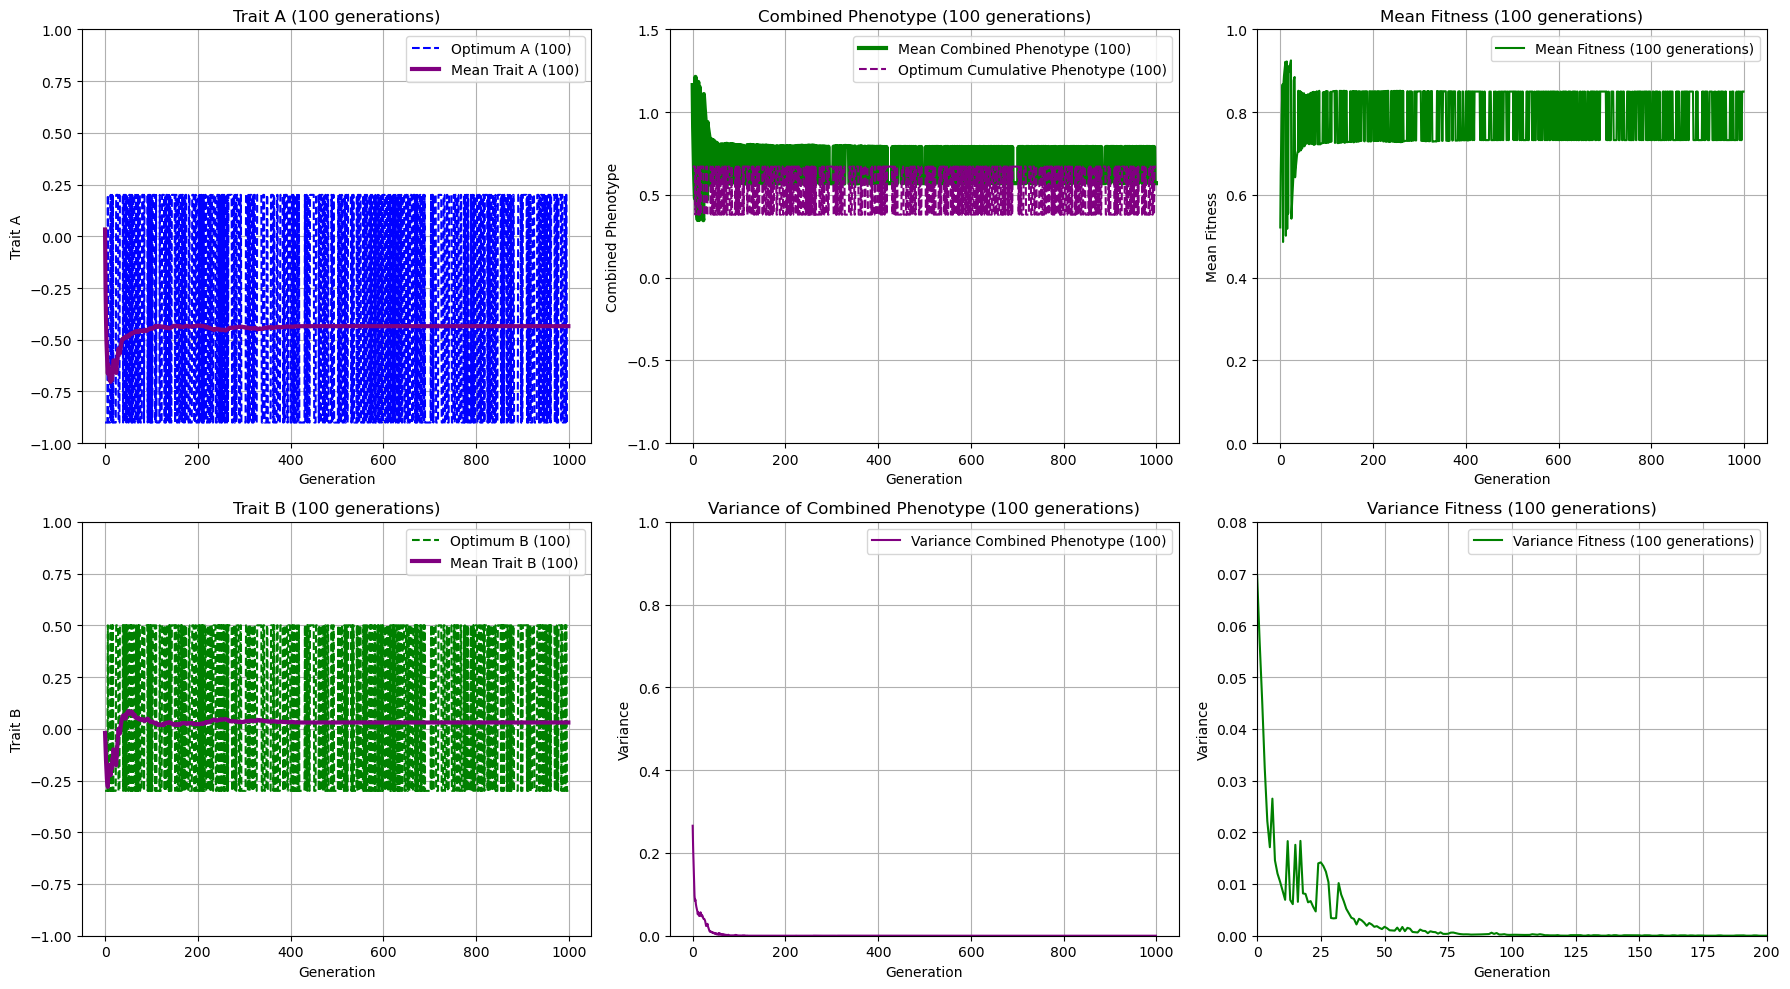

In [12]:


plt.figure(figsize=(18, 10))

# 1. Trait A comparison
plt.subplot(2, 3, 1)
plt.plot(optimum_A_over_time, label='Optimum A (100)', linestyle='--', color='blue')
plt.plot(mean_A_over_time, label='Mean Trait A (100)', color='purple', linewidth=3)
plt.title('Trait A (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Trait A')
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()

# 2. Trait B comparison
plt.subplot(2, 3, 4)
plt.plot(optimum_B_over_time, label='Optimum B (100)', linestyle='--', color='green')
plt.plot(mean_B_over_time, label='Mean Trait B (100)', color='purple', linewidth=3)
plt.title('Trait B (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Trait B')
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()

# 3. Cumulative Phenotype Mean vs Optimum
plt.subplot(2, 3, 2)
plt.plot(mean_com_pheno_over_time, label='Mean Combined Phenotype (100)', color='green', linewidth=3)
plt.plot(optimum_com_pheno_over_time, label='Optimum Cumulative Phenotype (100)', linestyle='--', color='purple')
plt.title('Combined Phenotype (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Combined Phenotype')
plt.ylim(-1, 1.5)
plt.grid(True)
plt.legend()

# 4. Cumulative Phenotype Variance
plt.subplot(2, 3, 5)
plt.plot(var_com_pheno_over_time, label='Variance Combined Phenotype (100)', color='purple')
plt.title('Variance of Combined Phenotype (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Variance')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

# 5. Mean Fitness
plt.subplot(2, 3, 3)
plt.plot(mean_fitness_over_time, label='Mean Fitness (100 generations)', color='green')
plt.title('Mean Fitness (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Mean Fitness')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

# 6. Variance Fitness
plt.subplot(2, 3, 6)
plt.plot(var_fitness_over_time, label='Variance Fitness (100 generations)', color='green')
plt.title('Variance Fitness (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Variance')
plt.ylim(0, 0.08)
plt.xlim(0, 200)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Why is mean fitness increasing then decreasing?

# Epigenetic architechture

### Uller, english paper

$$
y_{t+1} = hy_t + m_t + d_t
$$

$$
m_t = m_0 + m_1(x_t + \epsilon_t) ; \quad \text{with} \quad \epsilon_t \sim \mathcal{N}(0, \sigma^2_{\epsilon})
$$


So m0 is the baseline maternal effect if the mother does not respond to her environment, and m1 describes how much the maternal effect changes for a change in one unit of the environmental state. 


### Mcnamara paper



The adult phenotype of an individual is given by  
$$
x = \alpha z + \beta_J c_J + \beta_A c_A + \gamma (m + \epsilon_m) + \delta \epsilon_{\delta}
$$

where:

$$
m = x_{t-1}
$$

Genetic 'cue' genes:

$$
z = z' + \epsilon_Z \quad \text{where} \quad \epsilon_Z \sim \mathcal{N}(0, \sigma_{\text{mut}}^2)
$$


## What I plan to use 

##### The 'Phenotype'

$$
P = \alpha z +  \beta y_t + \gamma m_t + d_t
$$

Here; the quantitative genetic effect can take any real value. Surviving offspring of a parent with genetic effect value $z_{t-1}$ have effect value 
$$
z = z_{t-1} + \epsilon_Z \quad \text{where} \quad \epsilon_Z \sim \mathcal{N}(0, \sigma_{\text{mut}}^2)  
$$



Epigenetics is also defined as a quantitative genetic trait: Surviving offspring of a parent with epigenetic effect value $y_{t-1}$ have effect value 

$$
y_t = y_{t-1} + \epsilon_Y \quad \text{where} \quad \epsilon_Y \sim \mathcal{N}(0, \sigma_{\text{epimut}}^2)  
$$

Define environental change conditions

In [98]:
# Define states
states = ["Dry", "Wet"]
n_states = len(states)

# Transition probability matrix
Transition_probs = np.array([
    [0.6, 0.4],  # From Dry
    [0.4, 0.6]   # From Wet
])
# Simulate environment over time
n_gen = 1000
env_sequence = []
current_state = 0 

Env = np.array([
    [-0.9, -0.3],  
    [0.2, 0.5],  
 ])



Set gen-epigen parameters

In [111]:
##Set mutational effect sizes

sigma_mut=0.02
sigma_epimut=0.03
sigma_d=0.01

##strarting values of genetic and epigenetic weights 

alpha= 1
beta= 1

## Set population size and number of generations
population_size = 1000
n_gen = 1000

Set Maternal effects parameters (for now everything is 0!)

In [112]:
#baseline maternal effect

##FOR NOW WE SET MATERNAL WEIGHT AND TRAIT TO 0
gamma= 0
mat=0

Main simulation

In [113]:

## Sample the population at time = -1
z_a_t= np.random.uniform(low=-1, high=1, size=population_size) 
z_b_1= np.random.uniform(low=-1, high=1, size=population_size)
y_a_t = np.random.uniform(low=-0.5, high=0.5, size=population_size)
y_b_t = np.random.uniform(low=-0.5, high=0.5, size=population_size)



In [114]:
Transition_probs[0]

array([0.6, 0.4])

In [115]:

### Create empty lists ####
mean_fitness_over_time = []
mean_A_over_time = []
mean_B_over_time = []
optimum_A_over_time = []
optimum_B_over_time = []
mean_com_pheno_over_time = []
var_com_pheno_over_time= []
optimum_com_pheno_over_time = []
var_fitness_over_time= []
phenotype_over_time = []

for t in range(1, n_gen):
        env_sequence.append(states[current_state])  # Start at "Dry"
        current_state = np.random.choice([0,1], p=Transition_probs[current_state])

        #optima stats
        A0, B0 = Env[current_state]
        optimum_A_over_time.append(A0)
        optimum_B_over_time.append(B0)
        
       ## sample variances
        epsilon_Z = np.random.normal(0, sigma_mut, size=population_size)
        epsilon_Y = np.random.normal(0, sigma_epimut, size=population_size)
        d_t = np.random.normal(0, sigma_d, size=population_size)

        ##trait A
    
        z_a_t_plus_1 = z_a_t + epsilon_Z
        y_a_t_plus_1 = y_a_t + epsilon_Z

        z_b_t_plus_1 = z_b_t + epsilon_Z
        y_b_t_plus_1 = y_b_t + epsilon_Y

    
        P_a= alpha * z_a_t_plus_1 + beta * y_a_t_plus_1 + gamma * mat + d_t
        P_b= alpha * z_b_t_plus_1 + beta * y_b_t_plus_1 + gamma * mat + d_t
        P = z_combined(P_a,P_b,Env[current_state])
        fitness = w(P)
        relative_fitness = fitness/ P.mean()
    
       
        

        df = pd.DataFrame({'A_g': z_a_t_plus_1,
                           'A_e':y_a_t_plus_1,
                           'B_g': z_b_t_plus_1, 
                           'B_e': y_b_t_plus_1, 
                           'P_a':P_a,
                           'P_b':P_b,
                           'Phenotype':P,
                           'fitness': fitness,
                           'relative_fitness':relative_fitness})
        
    
        mean_fitness_over_time.append(df['fitness'].mean())
        var_fitness_over_time.append(df['fitness'].var())
        phenotype_over_time.append(df['Phenotype'].mean())
        mean_A_over_time.append(df['P_a'].mean())
        mean_B_over_time.append(df['P_b'].mean())
    
        sampled_df = df.sample(n=population_size, weights=df['relative_fitness'], replace=True)
        
        z_a_t=sampled_df['A_g'].values
        y_a_t=sampled_df['A_e'].values
        z_b_t=sampled_df['B_g'].values
        y_b_t=sampled_df['B_e'].values    


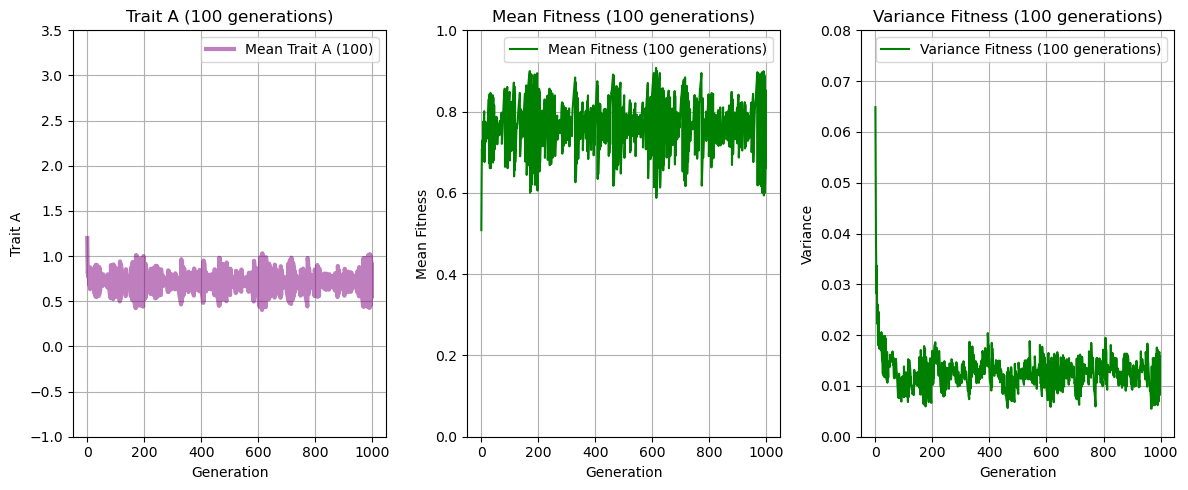

In [116]:
plt.figure(figsize=(12, 5))

# Mean Trait A comparison
plt.subplot(1, 3, 1)
#plt.plot(optimum_A_over_time, label='Optimum A (100)', linestyle='--', color='blue')
plt.plot(phenotype_over_time, label='Mean Trait A (100)', color='purple',linewidth=3, alpha=0.5)
plt.title('Trait A (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Trait A')
plt.ylim(-1, 3.5)
plt.grid(True)
plt.legend()

# Mean Trait B comparison
plt.subplot(1, 3, 2)
plt.plot(mean_fitness_over_time, label='Mean Fitness (100 generations)', color='green')
plt.title('Mean Fitness (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Mean Fitness')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

# Variance Fitness
plt.subplot(1, 3, 3)
plt.plot(var_fitness_over_time, label='Variance Fitness (100 generations)', color='green')
plt.title('Variance Fitness (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Variance')
plt.ylim(0, 0.08)
#plt.xlim(0, 1000)
plt.grid(True)
plt.legend()



plt.tight_layout()
plt.show()

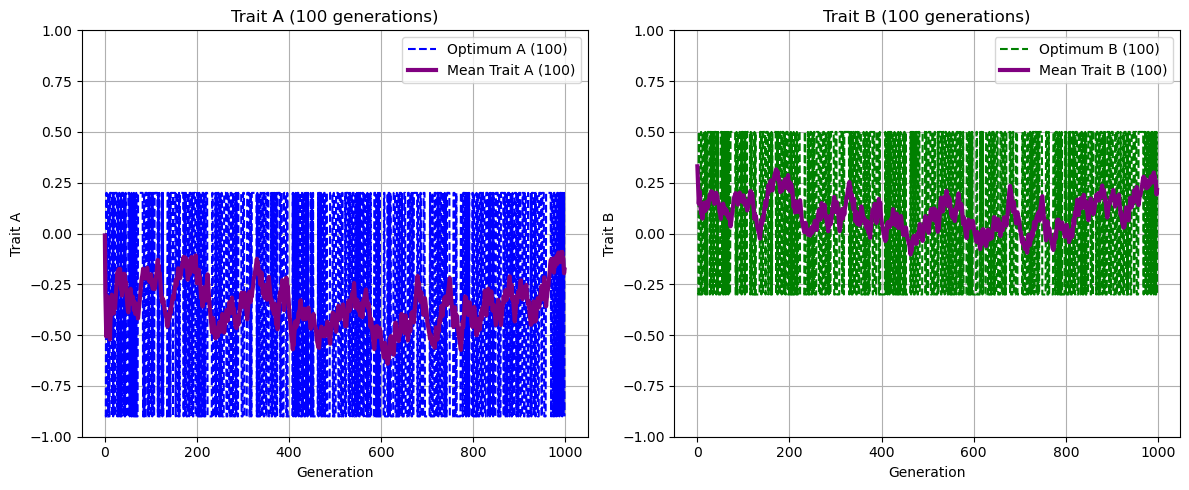

In [118]:
plt.figure(figsize=(12, 5))

# Mean Trait A comparison
plt.subplot(1, 2, 1)
plt.plot(optimum_A_over_time, label='Optimum A (100)', linestyle='--', color='blue')
plt.plot(mean_A_over_time, label='Mean Trait A (100)', color='purple',linewidth=3)
plt.title('Trait A (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Trait A')
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()

# Mean Trait B comparison
plt.subplot(1, 2, 2)
plt.plot(optimum_B_over_time, label='Optimum B (100)', linestyle='--', color='green')
plt.plot(mean_B_over_time, label='Mean Trait B (100)', color='purple',linewidth=3)
plt.title('Trait B (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Trait B')
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#### Maternal inheiritence

Uller and English use

$$
m_t = m_0 + m_1(x_t + \epsilon_t) ; \quad \text{with} \quad \epsilon_t \sim \mathcal{N}(0, \sigma^2_{\epsilon})
$$


So m0 is the baseline maternal effect if the mother does not respond to her environment, and m1 describes how much the maternal effect changes for a change in one unit of the environmental state. 


I use 

$$
m_{t+1} = m_0 + ((optima - m_t) + \epsilon_t)
$$

In [119]:

# Define states
states = ["Dry", "Wet"]
n_states = len(states)



Env = np.array([
    [-0.9, -0.3],  # optimaA_dry, optimaB_dry
    [0.2, 0.5],  #  optimaA_dry, optimaB_dry
 ])

#s = 0.1#stickyness param 

prob_stay= 0.6 

# Transition probability matrix
P = np.array([
    [prob_stay, (1-prob_stay)],  # From Dry, [[probability of staying in dry], probability of transitioning to wet]]
    [(1-prob_stay), prob_stay]   # From Wet  [[probability of switching to dry], probability of staying in Wet]]
])


# Simulate environment over time
n_gen = 100
env_sequence = []
current_state = 0 


for _ in range(n_gen):
    env_sequence.append(states[current_state])  # Start at "Dry"
    current_state = np.random.choice([0,1], p=P[current_state])
    A0, B0 = Env[current_state]

In [120]:
population_size = 1000

### Create empty lists ####
mean_fitness_over_time = []
mean_A_over_time = []
mean_B_over_time = []
optimum_A_over_time = []
optimum_B_over_time = []
mean_com_pheno_over_time = []
var_com_pheno_over_time= []
optimum_com_pheno_over_time = []
var_fitness_over_time= []


z1_vals = np.linspace(-1, 1, 100)
z2_vals = np.linspace(-1, 1, 100)
Ag = np.random.choice(z1_vals, size=population_size)
Bg = np.random.choice(z2_vals, size=population_size)


# Define states
states = ["Dry", "Wet"]
n_states = len(states)

# Transition probability matrix
P = np.array([
    [0.6, 0.4],  # From Dry
    [0.4, 0.6]   # From Wet
])
# Simulate environment over time
n_gen = 100
env_sequence = []
current_state = 0 

Env = np.array([
    [-0.9, -0.3],  
    [0.2, 0.5],  
 ])

#baseline maternal effect

m0_a, m0_b = [0.01, 0.02]
sigma_epsilon= 0.1
epsilon_t = np.random.normal(0, sigma_epsilon)


m_1a = 0
m_1b = 0

#starting values of ust the maternal effect
A = Ag + m0_a + (m_1a + epsilon_t)
B = Bg + m0_b + (m_1b + epsilon_t)

In [121]:
for _ in range(n_gen):
    env_sequence.append(states[current_state])  # Start at "Dry"
    current_state = np.random.choice([0,1], p=P[current_state])

    #optima stats
    A0, B0 = Env[current_state]
    optimum_A_over_time.append(A0)
    optimum_B_over_time.append(B0)


    epsilon_t = np.random.normal(0, sigma_epsilon)
    
    # Optimum combined phenotype
    optimum_cumulative = np.sqrt((A0**2 + B0**2)/2)
    optimum_com_pheno_over_time.append(optimum_cumulative)

    #Actual maternal information
    m1_a = (A0-A)
    m1_b = (B0-B)
    #print(m1_a)
    A = A  + (m0_a + m1_a + epsilon_t)
    B = B  + (m0_b + m1_b + epsilon_t)

    #print(A)
    #combined phenotype
    z_com= z_combined(A,B, Env[current_state])
    
    #print(z_com)
    df = pd.DataFrame({'Trait_A': A, 'Trait_B': B, 'Phenotype': z_com, 'fitness': w(z_com)})


    mean_A_over_time.append(df['Trait_A'].mean())
    mean_B_over_time.append(df['Trait_B'].mean())
    #print(df['fitness'])
    
    df['weights'] = df['fitness'] / df['fitness'].sum()
    #print(df['weights'])
    mean_fitness_over_time.append(df['fitness'].mean())

    
    var_fitness_over_time.append(df['fitness'].var())

    
    # Cumulative phenotype mean
    mean_com= df['Phenotype'].mean()
    mean_com_pheno_over_time.append(mean_com)
    
    # Cumulative phenotype variance
    var_com= df['Phenotype'].var()
    var_com_pheno_over_time.append(var_com)

    sampled_df = df.sample(n=population_size, weights=df['weights'], replace=True)
    
    

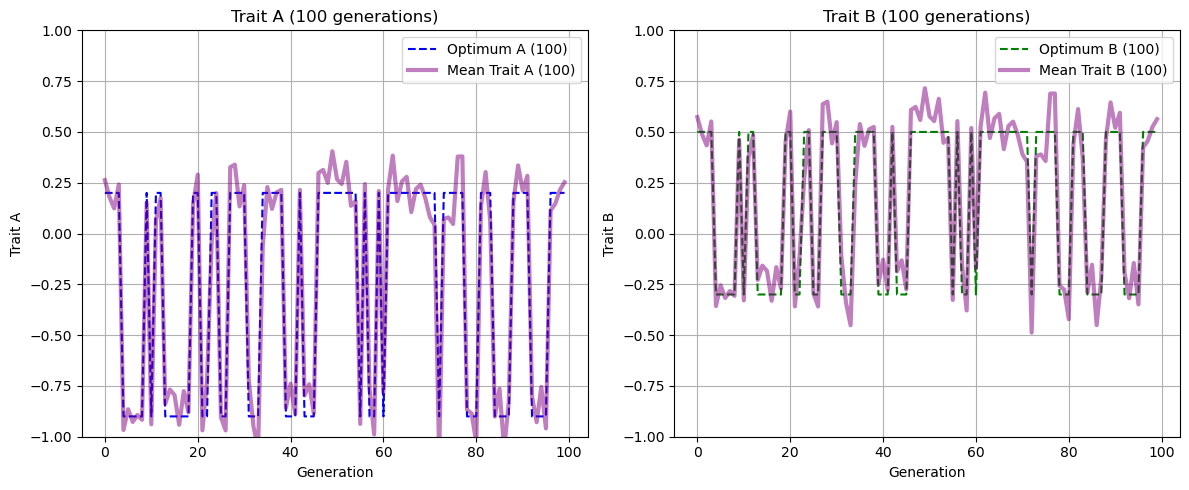

In [122]:
plt.figure(figsize=(12, 5))

# Mean Trait A comparison
plt.subplot(1, 2, 1)
plt.plot(optimum_A_over_time, label='Optimum A (100)', linestyle='--', color='blue')
plt.plot(mean_A_over_time, label='Mean Trait A (100)', color='purple',linewidth=3, alpha=0.5)
plt.title('Trait A (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Trait A')
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()

# Mean Trait B comparison
plt.subplot(1, 2, 2)
plt.plot(optimum_B_over_time, label='Optimum B (100)', linestyle='--', color='green')
plt.plot(mean_B_over_time, label='Mean Trait B (100)', color='purple',linewidth=3, alpha =0.5)
plt.title('Trait B (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Trait B')
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Putting things together

Define environental change conditions

In [123]:
# Define states
states = ["Dry", "Wet"]
n_states = len(states)

# Transition probability matrix
Transition_probs = np.array([
    [0.6, 0.4],  # From Dry
    [0.4, 0.6]   # From Wet
])
# Simulate environment over time
n_gen = 1000
env_sequence = []
current_state = 0 

Env = np.array([
    [-0.9, -0.3],  
    [0.2, 0.5],  
 ])



Set gen-epigen parameters

In [124]:
##Set mutational effect sizes

sigma_mut=0.02
sigma_epimut=0.03
sigma_d=0.01

##strarting values of genetic and epigenetic weights 

alpha= 1
beta= 1

## Set population size and number of generations
population_size = 1000
n_gen = 2000

Set Maternal effects parameters (for now everything is 0!)

In [92]:
#baseline maternal effect

##FOR NOW WE SET MATERNAL WEIGHT AND TRAIT TO 0
gamma= 0
mat=0

Set a per generation mutation rate

In [93]:
mu_g= 1e-06
mu_e= 1e-03


In [130]:

## Sample the population at time = -1
z_a_t= np.random.uniform(low=-1, high=1, size=population_size) 
z_b_1= np.random.uniform(low=-1, high=1, size=population_size)
y_a_t = np.random.uniform(low=-0.5, high=0.5, size=population_size)
y_b_t = np.random.uniform(low=-0.5, high=0.5, size=population_size)



In [131]:

### Create empty lists ####
mean_fitness_over_time = []
mean_A_over_time = []
mean_B_over_time = []
var_A_over_time = []
var_B_over_time = []
optimum_A_over_time = []
optimum_B_over_time = []
mean_com_pheno_over_time = []
var_com_pheno_over_time= []
optimum_com_pheno_over_time = []
var_fitness_over_time= []
phenotype_over_time = []

for t in range(1, (n_gen+1)):
        env_sequence.append(states[current_state])  # Start at "Dry"
        current_state = np.random.choice([0,1], p=Transition_probs[current_state])

        #optima stats
        A0, B0 = Env[current_state]
        optimum_A_over_time.append(A0)
        optimum_B_over_time.append(B0)
        
       ## sample variances
        epsilon_Z = np.random.normal(0, sigma_mut, size=population_size)
        epsilon_Y = np.random.normal(0, sigma_epimut, size=population_size)
        d_t = np.random.normal(0, sigma_d, size=population_size)

        ##genetic and epigenetic impact with mutation rate
    
        z_a_t_plus_1 = z_a_t + mu_g * epsilon_Z
        y_a_t_plus_1 = y_a_t + mu_e * epsilon_Y

        z_b_t_plus_1 = z_b_t + mu_g * epsilon_Z
        y_b_t_plus_1 = y_b_t + mu_e * epsilon_Y

        #Define maternal effects
        # Maternal effects from -1 generation
        m1_a = (A0 - (z_a_t + y_a_t))   # maternal information
        mt_a = m0_a + (m1_a + epsilon_t) #inheiritence of the maternal information with noice and baseline 

        m1_b = (A0 - (z_b_t + y_b_t))   # maternal information
        mt_b = m0_b + (m1_b + epsilon_t)

       #Compute the phenotypes
    
        P_a= alpha * z_a_t_plus_1 + beta * y_a_t_plus_1 + gamma * mt_a + d_t
        P_b= alpha * z_b_t_plus_1 + beta * y_b_t_plus_1 + gamma * mt_b + d_t

        
        P = z_combined(P_a,P_b,Env[current_state]) #euclidean distance

    
        fitness = w(P)
        relative_fitness = fitness/ P.mean()
    
        
        

        df = pd.DataFrame({'A_g': z_a_t_plus_1,
                           'A_e':y_a_t_plus_1,
                           'B_g': z_b_t_plus_1, 
                           'B_e': y_b_t_plus_1, 
                           'P_a': P_a,
                           'P_b': P_b,
                           'Phenotype':P,
                           'fitness': fitness,
                           'relative_fitness':relative_fitness})
    
        mean_fitness_over_time.append(df['fitness'].mean())
        var_fitness_over_time.append(df['fitness'].var())
        mean_A_over_time.append(df['P_a'].mean())
        var_A_over_time.append(df['P_a'].var())
        mean_B_over_time.append(df['P_b'].mean())
        var_B_over_time.append(df['P_a'].var())
        phenotype_over_time.append(df['Phenotype'].mean())
        sampled_df = df.sample(n=population_size, weights=df['relative_fitness'], replace=True)
        
        z_a_t=sampled_df['A_g'].values
        y_a_t=sampled_df['A_e'].values
        z_b_t=sampled_df['B_g'].values
        y_b_t=sampled_df['B_e'].values    


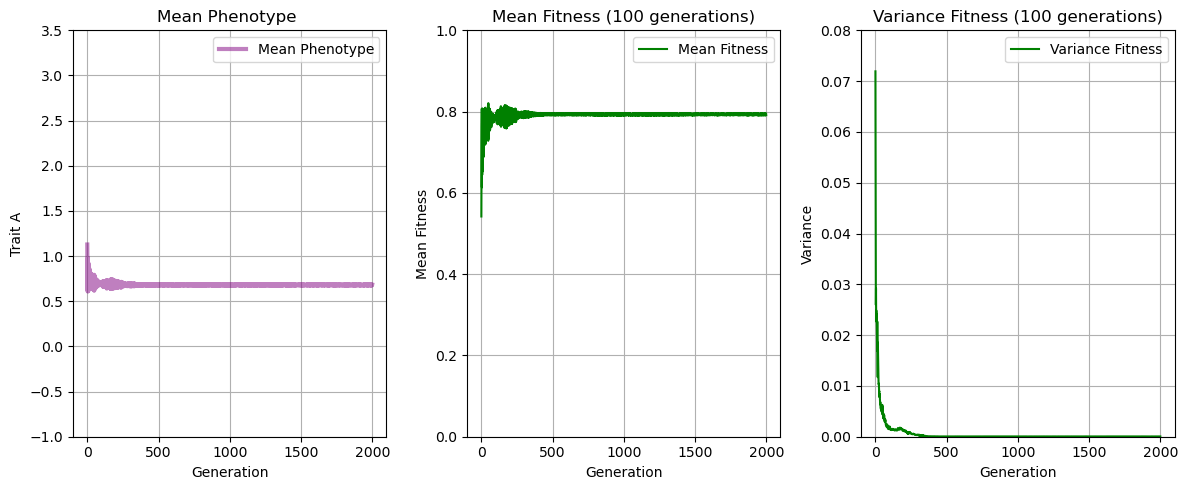

In [132]:
plt.figure(figsize=(12, 5))

# Mean Trait A comparison
plt.subplot(1, 3, 1)
#plt.plot(optimum_A_over_time, label='Optimum A (100)', linestyle='--', color='blue')
plt.plot(phenotype_over_time, label='Mean Phenotype', color='purple',linewidth=3, alpha=0.5)
plt.title('Mean Phenotype ')
plt.xlabel('Generation')
plt.ylabel('Trait A')
plt.ylim(-1, 3.5)
plt.grid(True)
plt.legend()

# Mean Trait B comparison
plt.subplot(1, 3, 2)
plt.plot(mean_fitness_over_time, label='Mean Fitness', color='green')
plt.title('Mean Fitness (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Mean Fitness')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

# Variance Fitness
plt.subplot(1, 3, 3)
plt.plot(var_fitness_over_time, label='Variance Fitness', color='green')
plt.title('Variance Fitness (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Variance')
plt.ylim(0, 0.08)
#plt.xlim(0, 1000)
plt.grid(True)
plt.legend()



plt.tight_layout()
plt.show()

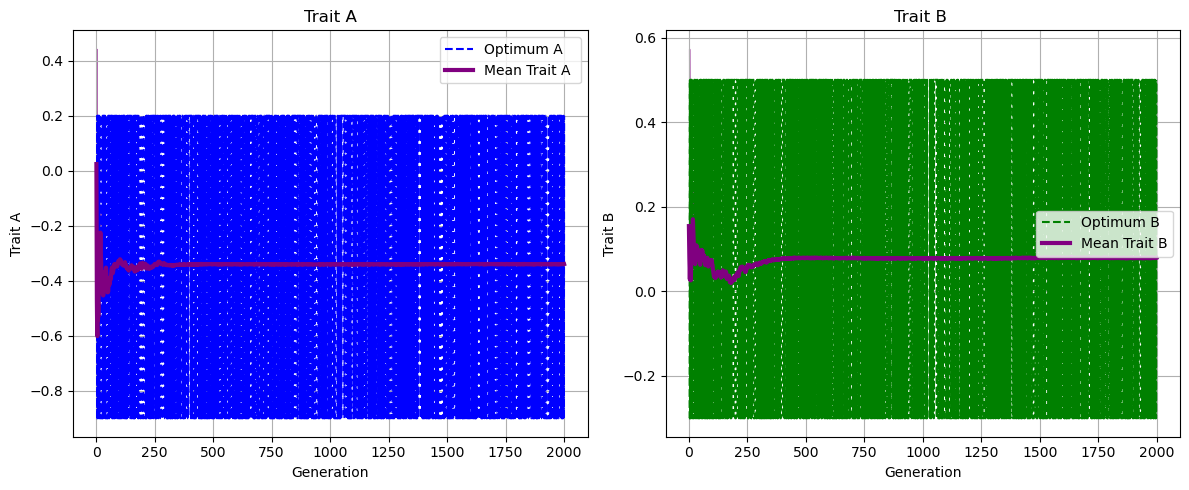

In [133]:
plt.figure(figsize=(12, 5))

generations = np.linspace(1,n_gen, n_gen)
# Mean Trait A comparison
plt.subplot(1, 2, 1)
y= np.array(mean_A_over_time)
error= np.array(var_A_over_time)

plt.plot(generations,optimum_A_over_time, label='Optimum A', linestyle='--', color='blue')
plt.plot(generations, mean_A_over_time, label='Mean Trait A ', color='purple',linewidth=3)
plt.fill_between(generations, y + error , y - error,alpha =0.6,color = 'purple')
plt.title('Trait A')
plt.xlabel('Generation')
plt.ylabel('Trait A')

plt.grid(True)
plt.legend()

# Mean Trait B comparison
plt.subplot(1, 2, 2)
y= np.array(mean_B_over_time)
error= np.array(var_B_over_time)
plt.plot(optimum_B_over_time, label='Optimum B ', linestyle='--', color='green')
plt.plot(mean_B_over_time, label='Mean Trait B', color='purple',linewidth=3)
plt.fill_between(generations, y + error , y - error, alpha =0.6, color = 'purple')
plt.title('Trait B ')
plt.xlabel('Generation')
plt.ylabel('Trait B')

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Environment (how uller and english do it)

$$
x_{t+1} = r. x_t + (1−r)μ_x + e_t
$$

which is 
Future state = current state(with some autocorrelation)+ long-term average (with some autocorrelation) + random noise


In [25]:
mu = 0
r=0.9
values_a = np.array([])
x_t_minus_1 =10
n_gen=1000

for _ in range(n_gen):

    e_t = np.random.normal(0, 2, 1)
    
    x_t= r*x_t_minus_1 + (1-r)* mu + e_t
    values_a= np.append(values_a, x_t)
    x_t_minus_1 = x_t
    #print(values_a)
    mu =values_a.mean()
    
    



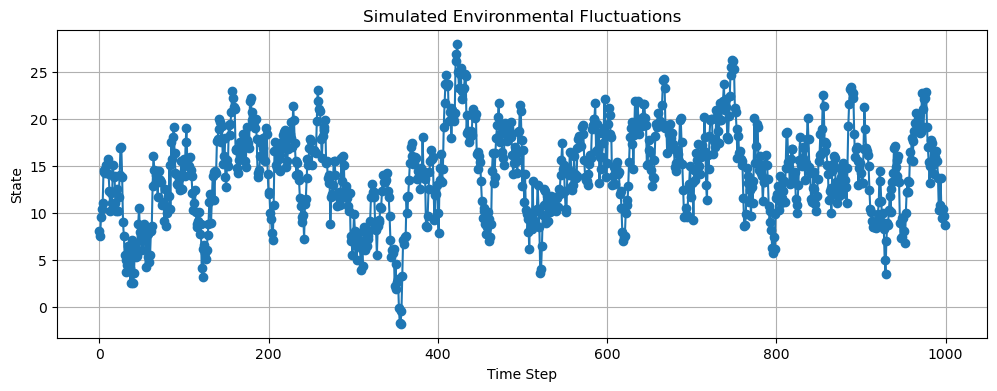

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(values_a, marker='o', linestyle='-', label='Environment')
plt.title("Simulated Environmental Fluctuations")
plt.xlabel("Time Step")
plt.ylabel("State")
#plt.yticks(range(n_states), states)
plt.grid(True)
plt.show()

### Full sim